In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

from sklearn import svm
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler  
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split 

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.base import BaseEstimator, TransformerMixin

import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from skimage.feature import hog
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import cv2, glob, random, math, numpy as np, dlib, itertools
import os
import random

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.preprocessing import label_binarize
#binarize the y_values
#Lets encode target labels (y) with values between 0 and n_classes-1.
#We will use the LabelEncoder to do this. 
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import sklearn
from sklearn import linear_model
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix

from sklearn.metrics import RocCurveDisplay

In [ ]:
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

In [ ]:
# ใส่ ข้อมูลตรงนี้

#X = np.load('/content/drive/MyDrive/feature_train/features_GABOR_embred.npy') 
#y = np.load('/content/drive/MyDrive/feature_train/labels_GABOR.npy')

#X = np.load('/content/drive/MyDrive/feature_train/features_HLAC.npy') 
#y = np.load('/content/drive/MyDrive/feature_train/labels_HLAC.npy')

X = np.load('/content/drive/MyDrive/Final_Feature_Extraction/HOG_embreded.npy') 
y = np.load('/content/drive/MyDrive/Final_Feature_Extraction/labels_HOG.npy')

#X = np.load('/content/drive/MyDrive/feature_train/features_LAND.npy',allow_pickle=True) 
#y = np.load('/content/drive/MyDrive/feature_train/labels_LAND.npy')

#X = np.load('/content/drive/MyDrive/feature_train/features_LBP.npy') 
#y = np.load('/content/drive/MyDrive/feature_train/labels_LBP.npy')

In [ ]:
X.shape

(23988, 5052)

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''

    cm1 = cf.astype(np.float64) / cf.sum(axis=1)[:, np.newaxis]
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ['{:.2f}'.format(value) for value in cm1.flatten()]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [ ]:
def model_roc_curve(X, y, model, cv):
    #ส่วน f.confusion matrix
    def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        """
        if not title:
            if normalize:
                title = 'Normalized confusion matrix'
            else:
                title = 'Confusion matrix, without normalization'

        # Compute confusion matrix
        cm1 = confusion_matrix(y_true, y_pred)
        # Only use the labels that appear in the data
        classes = classes
        if normalize:
            cm = cm1.astype('float') / cm1.sum(axis=1)[:, np.newaxis]
            #print("Normalized confusion matrix")
        #else:
            #print('Confusion matrix, without normalization')

        #print(cm)

        fig, ax = plt.subplots(figsize=(12,6))
        im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
        ax.figure.colorbar(im, ax=ax)
        # We want to show all ticks...
        ax.set(xticks=np.arange(cm.shape[1]),
               yticks=np.arange(cm.shape[0]),
               # ... and label them with the respective list entries
               xticklabels=classes, yticklabels=classes,
               title=title,
               ylabel='True label',
               xlabel='Predicted label')

        # Rotate the tick labels and set their alignment.
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
                 rotation_mode="anchor")

        # Loop over data dimensions and create text annotations.
        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i in range(cm.shape[0]):
            for j in range(cm.shape[1]):
                ax.text(j, i, format(cm[i, j], fmt),
                        ha="center", va="center",
                        color="white" if cm[i, j] > thresh else "black")
        fig.tight_layout()
        return ax

    #ตัวเเปร 5 fold สำหรับ roc curve
    fig1 = plt.figure(figsize=[8, 8])
    mean_score = []
    mean_fpr = np.linspace(0, 1, 100)
    tprs = []
    aucs = []
    y_testanger = []
    X_testanger = []
    
    fpr1 = []
    tpr1 = []
    roc_auc1 = []
    tprs1 = []
    aucs1 = []
    mean_fpr1 = np.linspace(0, 1, 100)

    fpr2 = []
    tpr2 = []
    roc_auc2 = []
    tprs2 = []
    aucs2 = []
    mean_fpr2 = np.linspace(0, 1, 100)

    fpr3 = []
    tpr3 = []
    roc_auc3 = []
    tprs3 = []
    aucs3 = []
    mean_fpr3 = np.linspace(0, 1, 100)

    fpr4= []
    tpr4= []
    roc_auc4= []
    tprs4 = []
    aucs4 = []
    mean_fpr4 = np.linspace(0, 1, 100)

    fpr5= []
    tpr5= []
    roc_auc5= []
    tprs5 = []
    aucs5 = []
    mean_fpr5 = np.linspace(0, 1, 100)

    fpr6= []
    tpr6= []
    roc_auc6= []
    tprs6 = []
    aucs6 = []
    mean_fpr6 = np.linspace(0, 1, 100)

    fpr7= []
    tpr7= []
    roc_auc7= []
    tprs7 = []
    aucs7 = []
    mean_fpr7 = np.linspace(0, 1, 100)
    
    fpr8= []
    tpr8= []
    roc_auc8= []
    tprs8 = []
    aucs8 = []
    mean_fpr8 = np.linspace(0, 1, 100)
    
    #parameter for find SD 
    sumAcc_anger =[]
    sumAcc_disgust =[]
    sumAcc_fear = []
    sumAcc_hapiness = []
    sumAcc_neutral = []
    sumAcc_sad = []
    sumAcc_surprise = []
    i = 0
    num = 1

    #เริ่มเเบ่ง fold
    for train, test in cv.split(X, y):
        X_train = X[train]
        X_test = X[test]
        y_train = y[train]
        y_test = y[test]
        y_testanger = []
        X_testanger = []
        model.fit(X_train, y_train)
        lw = 2
        y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))
        y_pred = model.predict_proba(X_test)
        #ค่า accuracy 5 fold crossval
        #accuracy = cross_val_score(model, X, y, scoring='accuracy', cv=cv)

        fpr = {}
        tpr = {}
        thresh ={}
        roc_auc = dict()
        classes=np.unique(y_test)
        n_class = classes.shape[0]

        #เก็บค่า fpr tpr เเต่ละอารมณ์ เเต่ละ fold
        fpr[0], tpr[0], _ = roc_curve(y_test_binarized[:,0],y_pred[:,0])
        fpr1.append(fpr[0])
        tpr1.append(tpr[0])
        tprs1.append(np.interp(mean_fpr1, fpr[0], tpr[0])) #ไว้ใช้หาค่า mean
        roc_auc[0] = auc(fpr[0], tpr[0])
        roc_auc1.append(roc_auc[0])
        aucs1.append(roc_auc[0]) #ไว้ใช้หาค่า std
        
        fpr[1], tpr[1], _ = roc_curve(y_test_binarized[:,1],y_pred[:,1])
        fpr2.append(fpr[1])
        tpr2.append(tpr[1])
        tprs2.append(np.interp(mean_fpr2, fpr[1], tpr[1]))
        roc_auc[1] = auc(fpr[1], tpr[1])
        roc_auc2.append(roc_auc[1])
        aucs2.append(roc_auc[1]) 
        
        fpr[2], tpr[2], _ = roc_curve(y_test_binarized[:,2],y_pred[:,2])
        fpr3.append(fpr[2])
        tpr3.append(tpr[2])
        tprs3.append(np.interp(mean_fpr3, fpr[2], tpr[2]))
        roc_auc[2] = auc(fpr[2], tpr[2])
        roc_auc3.append(roc_auc[2])
        aucs3.append(roc_auc[2])
        
        fpr[3], tpr[3], _ = roc_curve(y_test_binarized[:,3],y_pred[:,3])
        fpr4.append(fpr[3])
        tpr4.append(tpr[3])
        tprs4.append(np.interp(mean_fpr4, fpr[3], tpr[3]))
        roc_auc[3] = auc(fpr[3], tpr[3])
        roc_auc4.append(roc_auc[3])
        aucs4.append(roc_auc[3]) 
        
        fpr[4], tpr[4], _ = roc_curve(y_test_binarized[:,4],y_pred[:,4])
        fpr5.append(fpr[4])
        tpr5.append(tpr[4])
        tprs5.append(np.interp(mean_fpr5, fpr[4], tpr[4]))
        roc_auc[4] = auc(fpr[4], tpr[4])
        roc_auc5.append(roc_auc[4])
        aucs5.append(roc_auc[4]) 
        
        fpr[5], tpr[5], _ = roc_curve(y_test_binarized[:,5],y_pred[:,5])
        fpr6.append(fpr[5])
        tpr6.append(tpr[5])
        tprs6.append(np.interp(mean_fpr6, fpr[5], tpr[5]))
        roc_auc[5] = auc(fpr[5], tpr[5])
        roc_auc6.append(roc_auc[5])
        aucs6.append(roc_auc[5]) 
        
        fpr[6], tpr[6], _ = roc_curve(y_test_binarized[:,6],y_pred[:,6])
        fpr7.append(fpr[6])
        tpr7.append(tpr[6])
        tprs7.append(np.interp(mean_fpr7, fpr[6], tpr[6]))
        roc_auc[6] = auc(fpr[6], tpr[6])
        roc_auc7.append(roc_auc[6])
        aucs7.append(roc_auc[6])
        
        fpr[7], tpr[7], _ = roc_curve(y_test_binarized[:,7],y_pred[:,7])
        fpr8.append(fpr[7])
        tpr8.append(tpr[7])
        tprs8.append(np.interp(mean_fpr8, fpr[7], tpr[7]))
        roc_auc[7] = auc(fpr[7], tpr[7])
        roc_auc8.append(roc_auc[7])
        aucs8.append(roc_auc[7])
        
        #save models
        #save models
        #filename = "Model_LAND :" + "Random" + str(i)  + ".sav"
        filename = 'HOG' + str(model) + str(num) + '.sav'
        pickle.dump(model, open(filename, 'wb'))
        print('fold '+ str(num))
        print()
        num += 1

        


        #confusion matrix
        label_mapdisgust = ['anger','contempt','disgust','fear','hapiness','neutral','sad','surprise']
        pred = model.predict(X_test)
        cm = confusion_matrix(y_test, pred)
        #cm1 = cm.astype(np.float64) / cm.sum(axis=1)[:, np.newaxis]
        cm_df = pd.DataFrame(cm, index = label_mapdisgust,
                             columns = label_mapdisgust
                            )
        
        final_cm = cm_df

        #เเสดงผล confus matrix
        emotion_labels = ['anger','contempt','disgust','fear','hapiness','neutral','sad','surprise']
        plt.figure(figsize = (5,5))
        #sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
        make_confusion_matrix(cm, figsize=(9,7), categories=emotion_labels)
        plt.title('Emotion Classify')
        plt.ylabel('True class')
        plt.xlabel('Prediction class')
        plt.show()
        
        #emotion_labels = ['anger','disgust','fear','hapiness','neutral','sad','surprise']
        #plot_confusion_matrix(y_test, pred, classes=emotion_labels, normalize=True, title='Normalized confusion matrix {}'.format(model))
        #plt.show()
        
        #Accurancy Score
        def add_values_in_dict(sample_dict, key, list_of_values):
            ''' Append multiple values to a key in 
            the given dictionary '''
            if key not in sample_dict:
                sample_dict[key] = list()
            sample_dict[key].extend(list_of_values)
            return sample_dict

        #ใช้เก็บค่า TP FP FN TN ใน loop  confus matrix 7*7
        TP2 = 0
        FP2 = 0 
        FN2 = 0
        TN2 = 0
        scor = {}
        avg_scor = {}
        ac = 0
        pr = 0
        re = 0
        f1 = 0
        sp = 0
        for i in range(final_cm.shape[0]):
          TP = final_cm.iloc[i,i]
          FP =  final_cm.iloc[i,:].sum() - TP
          FN =  final_cm.iloc[: ,i].sum() - TP
          TN =  final_cm.sum().sum() - TP -FP - FN
          TP2 += TP
          FP2 += FP
          FN2 += FN
          TN2 += TN
          Accuracy = (TP + TN)  /  final_cm.sum().sum()
          Precision = TP / (TP + FP)
          Recall = TP / (TP + FN)
          Specificity = TN / (TN + FP)
          F1_Score = (2* Precision * Recall ) / (Precision + Recall)
            
            
          if i == 0:
              sumAcc_anger.append(Accuracy)
          if i == 1:
              sumAcc_disgust.append(Accuracy)
          if i == 2:
              sumAcc_fear.append(Accuracy)
          if i == 3:
              sumAcc_hapiness.append(Accuracy)
          if i == 4:
              sumAcc_neutral.append(Accuracy)
          if i == 5:
              sumAcc_sad.append(Accuracy)
          if i == 6:
              sumAcc_surprise.append(Accuracy)
                
          print("Class:",final_cm.index[i],"Accuracy:",Accuracy,"Precision:", Precision,"Recall:", Recall, 
                "F1_Score:", F1_Score, "Specificity:", Specificity )
          print()

          ac += Accuracy
          pr += Precision
          re += Recall
          f1 += F1_Score
          sp += Specificity

          add_values_in_dict(scor, final_cm.index[i], [f'{Accuracy:.2f}',f'{Precision:.2f}',f'{Recall:.2f}',f'{F1_Score:.2f}',f'{Specificity:.2f}'])
        print ("{:<10} {:<10} {:<10} {:<10} {:<10} {:<10}".format('','Accuracy','Precision','Recall','F1_Score','Specificity'))
        for k, v in scor.items():
            Accuracy, Precision, Recall,F1_Score,Specificity = v
            print ("{:<10} {:<10} {:<10} {:<10} {:<10} {:<10}".format(k, Accuracy, Precision, Recall,F1_Score,Specificity))
              #pd.DataFrame(classification_report(model.y_train, model.pred)).T
        add_values_in_dict(avg_scor,'macro avg',[f'{ac/8:.2f}' , f'{pr/8:.2f}' , f'{re/8:.2f}' , f'{f1/8:.2f}', f'{sp/8:.2f}'])
        print()
        for k, v in avg_scor.items():
            ac, pr, re,f1,sp = v
            print ("{:<10} {:<10} {:<10} {:<10} {:<10} {:<10}".format(k, ac, pr, re,f1,sp))
   
        
        Specificity = TN2 / (TN2 + FP2)
        Sensitivity = TP2 / (FN2 + TP2)
        print()  
        print("Specificity", f'{Specificity:.2f}')
        print("Sensitivity", f'{Sensitivity:.2f}')
        #print(f"Overall Accuracy: {accuracy_score(y_test, pred) * 100:.2f}%")
        print()
        print("TP:", TP2)
        print("FN:", FN2)
        print("FP:", FP2)
        print("TN:", TN2)

        print()
        Score = accuracy_score(y_test, pred)
        mean_score.append(Score)
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
#สิ้นสุด loop 5 fold
    print()
    #print(f'accuracy = {accuracy}')
    #print(f'Mean accuracy = {np.mean(accuracy)}')
    #print(f'Max accuracy = {np.max(accuracy)}')
    #print(f'Mean AUC = {mean_auc}')
    score_np = np.array(mean_score)
    print(f'Mean accuracy = {np.mean(mean_score) * 100:.2f}%')
    print()
    STD1 = np.std(sumAcc_anger)*100
    print("The Standard diviation Accuracy of Anger :", STD1,"%")
    STD2 = np.std(sumAcc_disgust)*100
    print("The Standard diviation Accuracy of Disgust :", STD2,"%")
    STD3 = np.std(sumAcc_fear)*100
    print("The Standard diviation Accuracy of Fear :", STD3,"%")
    STD4 = np.std(sumAcc_hapiness)*100
    print("The Standard diviation Accuracy of Hapiness :", STD4,"%")
    STD5 = np.std(sumAcc_neutral)*100
    print("The Standard diviation Accuracy of Neutral :", STD5,"%")
    STD6 = np.std(sumAcc_sad)*100
    print("The Standard diviation Accuracy of Sad :", STD6,"%")
    STD7 = np.std(sumAcc_surprise)*100
    print("The Standard diviation Accuracy of Surprise :", STD7,"%")

    #print ROC curve in each emotion
    for i in range(5) :
        plt.plot(fpr1[i], tpr1[i], linestyle='--', 
                        label='%s fold %d (AUC=%0.2f)'%(classes[0],i,roc_auc1[i]))
        i +=1
    mean_tpr1 = np.mean(tprs1, axis=0)
    mean_auc1 = auc(mean_fpr1, mean_tpr1)
    mean_tpr1[0] = 0.0
    std_auc1 = np.std(aucs1)
    plt.plot(mean_fpr1, mean_tpr1, color='blue',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f )' % (mean_auc1, std_auc1), lw=2, alpha=1)    
    std_tpr = np.std(tprs1, axis=0)
    tprs_upper = np.minimum(mean_tpr1 + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr1 - std_tpr, 0)
    plt.fill_between(
        mean_fpr1,
        tprs_lower,
        tprs_upper,
        color="grey",
        alpha=0.2,
        label=r"$\pm$ 1 std. dev.")
    plt.plot([0,1],[0,1],'b--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.title('Multiclass ROC curve {}'.format(model))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='lower right')
    plt.show()
    print()
    

    for i in range(5) :
        plt.plot(fpr2[i], tpr2[i], linestyle='--', 
                        label='%s fold %d (AUC=%0.2f)'%(classes[1], i, roc_auc2[i]))
        i += 1
    mean_tpr2 = np.mean(tprs2, axis=0)
    mean_auc2 = auc(mean_fpr2, mean_tpr2)
    mean_tpr2[0] = 0.0
    std_auc2 = np.std(aucs2)
    plt.plot(mean_fpr2, mean_tpr2, color='blue',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f )' % (mean_auc2, std_auc2), lw=2, alpha=1)    
    std_tpr = np.std(tprs2, axis=0)
    tprs_upper = np.minimum(mean_tpr2 + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr2 - std_tpr, 0)
    plt.fill_between(
        mean_fpr2,
        tprs_lower,
        tprs_upper,
        color="grey",
        alpha=0.2,
        label=r"$\pm$ 1 std. dev.")
    plt.plot([0,1],[0,1],'b--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.title('Multiclass ROC curve {}'.format(model))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='lower right')
    plt.show()
    print()
                                                                           
    for i in range(5) :
        plt.plot(fpr3[i], tpr3[i], linestyle='--', 
                        label='%s fold %d (AUC=%0.2f)'%(classes[2],i,roc_auc3[i]))
        i+=1
    mean_tpr3 = np.mean(tprs3, axis=0)
    mean_auc3 = auc(mean_fpr3, mean_tpr3)
    mean_tpr3[0] = 0.0
    std_auc3 = np.std(aucs3)
    plt.plot(mean_fpr3, mean_tpr3, color='blue',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f )' % (mean_auc3, std_auc3), lw=2, alpha=1)   
    std_tpr = np.std(tprs3, axis=0)
    tprs_upper = np.minimum(mean_tpr3 + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr3 - std_tpr, 0)
    plt.fill_between(
        mean_fpr3,
        tprs_lower,
        tprs_upper,
        color="grey",
        alpha=0.2,
        label=r"$\pm$ 1 std. dev.")
    plt.plot([0,1],[0,1],'b--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.title('Multiclass ROC curve {}'.format(model))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='lower right')
    plt.show()
    print()
    
    for i in range(5) :
        plt.plot(fpr4[i], tpr4[i], linestyle='--', 
                        label='%s fold %d (AUC=%0.2f)'%(classes[3],i,roc_auc4[i]))
        i+=1
    mean_tpr4 = np.mean(tprs4, axis=0)
    mean_auc4 = auc(mean_fpr4, mean_tpr4)
    mean_tpr4[0] = 0.0
    std_auc4 = np.std(aucs4)
    plt.plot(mean_fpr4, mean_tpr4, color='blue',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f )' % (mean_auc4, std_auc4), lw=2, alpha=1)     
    std_tpr = np.std(tprs4, axis=0)
    tprs_upper = np.minimum(mean_tpr4 + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr4 - std_tpr, 0)
    plt.fill_between(
        mean_fpr4,
        tprs_lower,
        tprs_upper,
        color="grey",
        alpha=0.2,
        label=r"$\pm$ 1 std. dev.")
    plt.plot([0,1],[0,1],'b--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.title('Multiclass ROC curve {}'.format(model))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='lower right')
    plt.show()
    print()
                                            
    for i in range(5) :
        plt.plot(fpr5[i], tpr5[i], linestyle='--', 
                        label='%s fold %d (AUC=%0.2f)'%(classes[4],i,roc_auc5[i]))
        i+=1
    mean_tpr5 = np.mean(tprs5, axis=0)
    mean_auc5 = auc(mean_fpr5, mean_tpr5)
    mean_tpr5[0] = 0.0
    std_auc5 = np.std(aucs5)
    plt.plot(mean_fpr5, mean_tpr5, color='blue',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f )' % (mean_auc5, std_auc5), lw=2, alpha=1)     
    std_tpr = np.std(tprs5, axis=0)
    tprs_upper = np.minimum(mean_tpr5 + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr5 - std_tpr, 0)
    plt.fill_between(
        mean_fpr5,
        tprs_lower,
        tprs_upper,
        color="grey",
        alpha=0.2,
        label=r"$\pm$ 1 std. dev.")
    plt.plot([0,1],[0,1],'b--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.title('Multiclass ROC curve {}'.format(model))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='lower right')
    plt.show()
    print()
    
    for i in range(5) :
        plt.plot(fpr6[i], tpr6[i], linestyle='--', 
                        label='%s fold %d (AUC=%0.2f)'%(classes[5],i,roc_auc6[i]))
        i+=1
    mean_tpr6 = np.mean(tprs6, axis=0)
    mean_auc6 = auc(mean_fpr6, mean_tpr6)
    mean_tpr6[0] = 0.0
    std_auc6 = np.std(aucs6)
    plt.plot(mean_fpr6, mean_tpr6, color='blue',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f )' % (mean_auc6, std_auc6), lw=2, alpha=1)   
    std_tpr = np.std(tprs6, axis=0)
    tprs_upper = np.minimum(mean_tpr6 + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr6 - std_tpr, 0)
    plt.fill_between(
        mean_fpr6,
        tprs_lower,
        tprs_upper,
        color="grey",
        alpha=0.2,
        label=r"$\pm$ 1 std. dev.")
    plt.plot([0,1],[0,1],'b--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.title('Multiclass ROC curve {}'.format(model))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='lower right')
    plt.show()
    print()
    
    for i in range(5) :
        plt.plot(fpr7[i], tpr7[i], linestyle='--', 
                        label='%s fold %d (AUC=%0.2f)'%(classes[6],i,roc_auc7[i]))
        i+=1
    mean_tpr7 = np.mean(tprs7, axis=0)
    mean_auc7 = auc(mean_fpr7, mean_tpr7)
    mean_tpr7[0] = 0.0
    std_auc7 = np.std(aucs7)
    plt.plot(mean_fpr7, mean_tpr7, color='blue',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f )' % (mean_auc7, std_auc7), lw=2, alpha=1) 
    std_tpr = np.std(tprs7, axis=0)
    tprs_upper = np.minimum(mean_tpr7 + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr7 - std_tpr, 0)
    plt.fill_between(
        mean_fpr7,
        tprs_lower,
        tprs_upper,
        color="grey",
        alpha=0.2,
        label=r"$\pm$ 1 std. dev.")
    plt.plot([0,1],[0,1],'b--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.title('Multiclass ROC curve {}'.format(model))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='lower right')
    plt.show()
    print()
    
    for i in range(5) :
        plt.plot(fpr8[i], tpr8[i], linestyle='--', 
                        label='%s fold %d (AUC=%0.2f)'%(classes[2],i,roc_auc8[i]))
        i+=1
    mean_tpr8 = np.mean(tprs8, axis=0)
    mean_auc8 = auc(mean_fpr8, mean_tpr8)
    mean_tpr8[0] = 0.0
    std_auc8 = np.std(aucs8)
    plt.plot(mean_fpr8, mean_tpr8, color='blue',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f )' % (mean_auc8, std_auc8), lw=2, alpha=1)   
    std_tpr = np.std(tprs8, axis=0)
    tprs_upper = np.minimum(mean_tpr8 + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr8 - std_tpr, 0)
    plt.fill_between(
        mean_fpr8,
        tprs_lower,
        tprs_upper,
        color="grey",
        alpha=0.2,
        label=r"$\pm$ 1 std. dev.")
    plt.plot([0,1],[0,1],'b--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.title('Multiclass ROC curve {}'.format(model))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='lower right')
    plt.show()
    print()


In [ ]:
X.shape

(23988, 5052)

fold 1



<Figure size 576x576 with 0 Axes>

<Figure size 360x360 with 0 Axes>

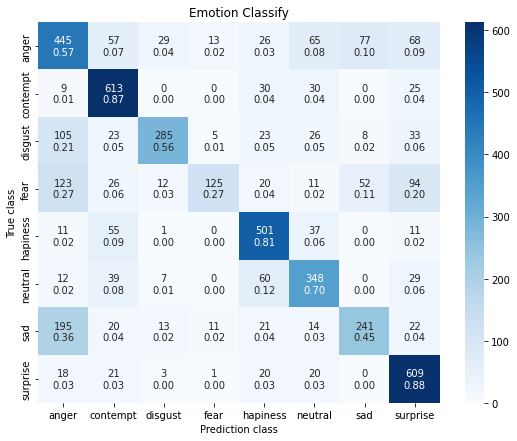

Class: anger Accuracy: 0.8315964985410588 Precision: 0.5705128205128205 Recall: 0.48474945533769065 F1_Score: 0.5241460541813898 Specificity: 0.913659793814433

Class: contempt Accuracy: 0.9301792413505627 Precision: 0.867043847241867 Recall: 0.7177985948477752 F1_Score: 0.7853939782190903 Specificity: 0.9761663286004056

Class: disgust Accuracy: 0.9399749895789913 Precision: 0.5610236220472441 Recall: 0.8142857142857143 F1_Score: 0.6643356643356643 Specificity: 0.9498651079136691

Class: fear Accuracy: 0.9233013755731555 Precision: 0.26997840172786175 Recall: 0.8064516129032258 F1_Score: 0.40453074433656955 Specificity: 0.9272022399310791

Class: hapiness Accuracy: 0.9343476448520217 Precision: 0.8133116883116883 Recall: 0.7146932952924394 F1_Score: 0.7608200455580866 Specificity: 0.9719306809860874

Class: neutral Accuracy: 0.9270529387244685 Precision: 0.703030303030303 Recall: 0.631578947368421 F1_Score: 0.6653919694072657 Specificity: 0.9653873322345184

Class: sad Accuracy: 0.909

<Figure size 360x360 with 0 Axes>

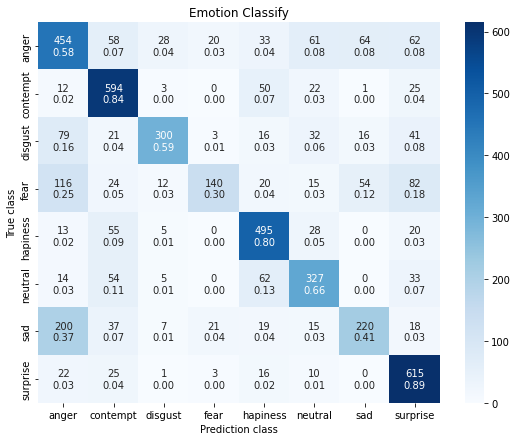

Class: anger Accuracy: 0.8370154230929554 Precision: 0.5820512820512821 Recall: 0.4989010989010989 F1_Score: 0.5372781065088756 Specificity: 0.9161522633744856

Class: contempt Accuracy: 0.9193413922467695 Precision: 0.8401697312588402 Recall: 0.684331797235023 F1_Score: 0.7542857142857142 Specificity: 0.9712468193384224

Class: disgust Accuracy: 0.9439349729053772 Precision: 0.5905511811023622 Recall: 0.8310249307479224 F1_Score: 0.6904487917146144 Specificity: 0.953121478476448

Class: fear Accuracy: 0.9228845352230096 Precision: 0.3023758099352052 Recall: 0.7486631016042781 F1_Score: 0.4307692307692308 Specificity: 0.9299501192799826

Class: hapiness Accuracy: 0.9297624010004168 Precision: 0.8035714285714286 Recall: 0.6962025316455697 F1_Score: 0.7460437076111531 Specificity: 0.970393931979447

Class: neutral Accuracy: 0.9268445185493955 Precision: 0.6606060606060606 Recall: 0.6411764705882353 F1_Score: 0.6507462686567166 Specificity: 0.960820895522388

Class: sad Accuracy: 0.905794

<Figure size 360x360 with 0 Axes>

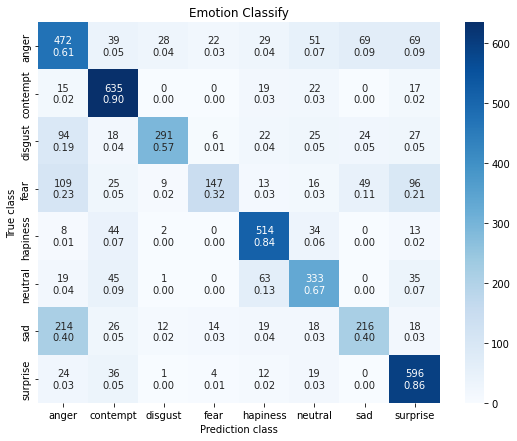

Class: anger Accuracy: 0.8353480616923719 Precision: 0.6059050064184852 Recall: 0.4942408376963351 F1_Score: 0.544405997693195 Specificity: 0.9201144938849857

Class: contempt Accuracy: 0.9362234264276782 Precision: 0.8968926553672316 Recall: 0.7315668202764977 F1_Score: 0.8058375634517767 Specificity: 0.9814249363867684

Class: disgust Accuracy: 0.9439349729053772 Precision: 0.5739644970414202 Recall: 0.8459302325581395 F1_Score: 0.6839012925969448 Specificity: 0.9515042658284688

Class: fear Accuracy: 0.9243434764485202 Precision: 0.3168103448275862 Recall: 0.7616580310880829 F1_Score: 0.4474885844748858 Specificity: 0.9311617806731813

Class: hapiness Accuracy: 0.9420591913297207 Precision: 0.8357723577235773 Recall: 0.743849493487699 F1_Score: 0.787136294027565 Specificity: 0.9754078402727051

Class: neutral Accuracy: 0.9274697790746145 Precision: 0.6713709677419355 Recall: 0.6428571428571429 F1_Score: 0.6568047337278108 Specificity: 0.9619158878504673

Class: sad Accuracy: 0.90350

<Figure size 360x360 with 0 Axes>

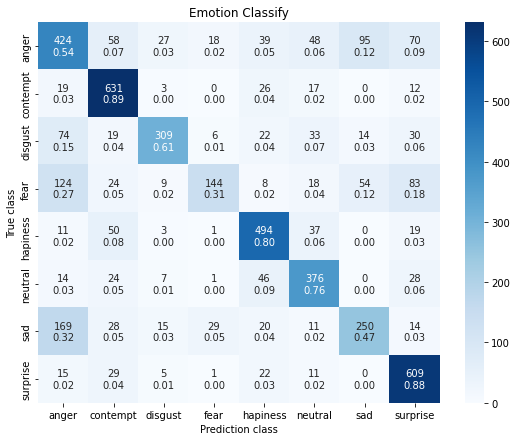

Class: anger Accuracy: 0.837189910360642 Precision: 0.5442875481386393 Recall: 0.4988235294117647 F1_Score: 0.5205647636586864 Specificity: 0.9100582721053965

Class: contempt Accuracy: 0.9355847404627893 Precision: 0.8912429378531074 Recall: 0.7311703360370799 F1_Score: 0.8033099936346276 Specificity: 0.9804270462633452

Class: disgust Accuracy: 0.9443402126328956 Precision: 0.6094674556213018 Recall: 0.8174603174603174 F1_Score: 0.6983050847457627 Specificity: 0.955193482688391

Class: fear Accuracy: 0.9216176777152387 Precision: 0.3103448275862069 Recall: 0.72 F1_Score: 0.4337349397590362 Specificity: 0.9303893843811181

Class: hapiness Accuracy: 0.9366270585782781 Precision: 0.8032520325203252 Recall: 0.7296898079763663 F1_Score: 0.7647058823529411 Specificity: 0.970631067961165

Class: neutral Accuracy: 0.938503231186158 Precision: 0.7580645161290323 Recall: 0.6823956442831216 F1_Score: 0.7182425978987584 Specificity: 0.9717381064531324

Class: sad Accuracy: 0.9063998332291016 Pre

<Figure size 360x360 with 0 Axes>

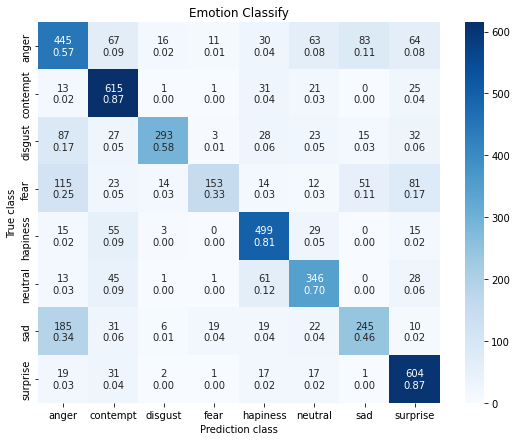

Class: anger Accuracy: 0.837189910360642 Precision: 0.5712451861360719 Recall: 0.49887892376681614 F1_Score: 0.5326152004787552 Specificity: 0.9144686299615877

Class: contempt Accuracy: 0.9226599958307276 Precision: 0.8698727015558698 Recall: 0.6879194630872483 F1_Score: 0.7682698313554028 Specificity: 0.9764283884191648

Class: disgust Accuracy: 0.9462163852407754 Precision: 0.5767716535433071 Recall: 0.8720238095238095 F1_Score: 0.6943127962085307 Specificity: 0.9518045281327057

Class: fear Accuracy: 0.9278715864081718 Precision: 0.3304535637149028 Recall: 0.8095238095238095 F1_Score: 0.4693251533742331 Specificity: 0.9327256944444444

Class: hapiness Accuracy: 0.9339170314780071 Precision: 0.810064935064935 Recall: 0.7138769670958512 F1_Score: 0.7589353612167301 Specificity: 0.9714494875549048

Class: neutral Accuracy: 0.9299562226391495 Precision: 0.6989898989898989 Recall: 0.649155722326454 F1_Score: 0.6731517509727627 Specificity: 0.9650562851782364

Class: sad Accuracy: 0.9078

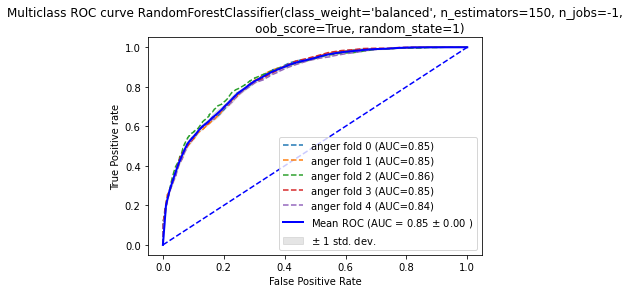

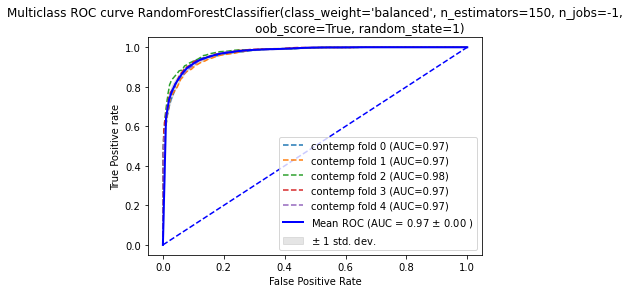

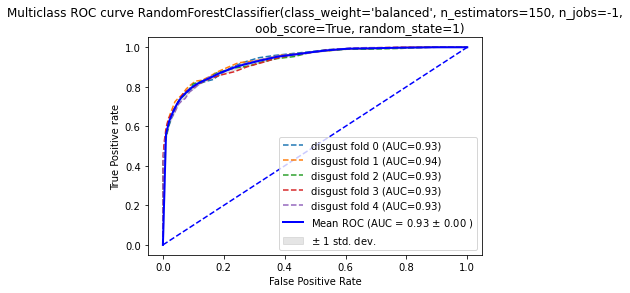

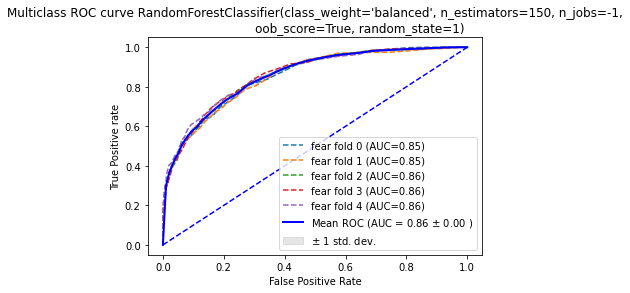

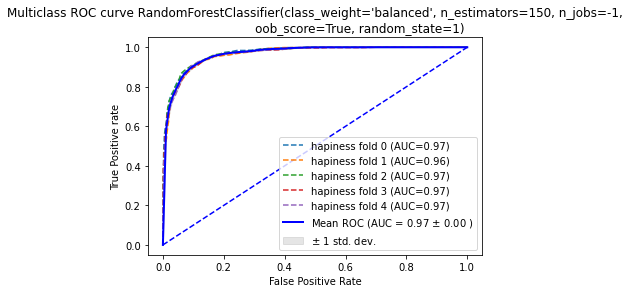

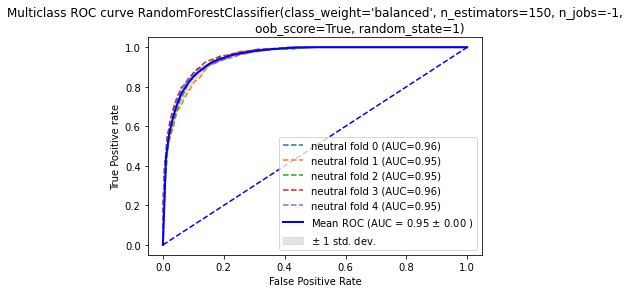

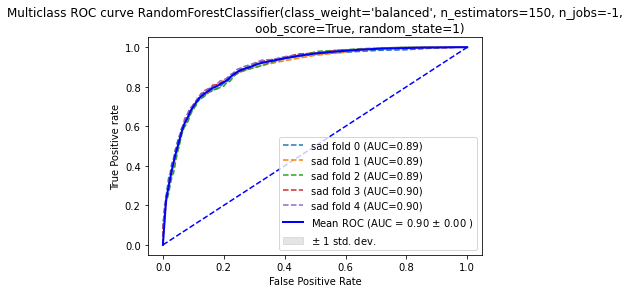

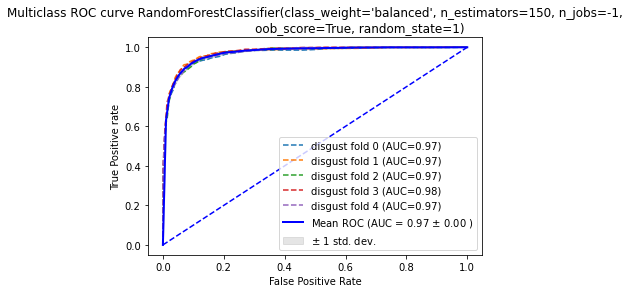

In [ ]:
import matplotlib.pyplot as plt1
algo = [
            [RandomForestClassifier(n_estimators = 150,oob_score = True,n_jobs = -1,random_state =1,class_weight = 'balanced'), 'RandomForestClassifier']]
for a in algo:
  model = a[0]
    
  model_roc_curve(X, y, model,cv)

In [ ]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=50)
}

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=5, n_jobs=-1)
nbModel_grid.fit(X, y)
print(nbModel_grid.best_estimator_)

GaussianNB(priors=None, var_smoothing=1.0)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


KeyboardInterrupt: ignored

In [ ]:
X_test = np.load("/content/drive/MyDrive/cn240/Feature_train_V4/test_HOG_V4_embreded.npy")

In [ ]:
y_test = np.load("/content/drive/MyDrive/cn240/Feature_train_V4/feature_test/labels_HOG.npy")

In [ ]:
y_pred = nbModel_grid.predict(X_test)
print(y_pred)

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred), ": is the confusion matrix")
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred), ": is the accuracy score")
from sklearn.metrics import precision_score

from sklearn.metrics import recall_score

from sklearn.metrics import f1_score


In [ ]:
from sklearn import GridSearchCV
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=5,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X, y)

In [ ]:
import matplotlib.pyplot as plt1
algo = [
            [KNeighborsClassifier(n_neighbors=5), 'KNeighborsClassifier'],
            [linear_model.LogisticRegression(C=1e5), 'LogisticRegression']]
for a in algo:
  model = a[0]
    
  model_roc_curve(X, y, model,cv)

#kbest

In [ ]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()

param_grid = {'n_neighbors' : np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

from sklearn import svm
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler  
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split 

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.base import BaseEstimator, TransformerMixin

import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from skimage.feature import hog
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import cv2, glob, random, math, numpy as np, dlib, itertools
import os
import random

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.preprocessing import label_binarize
#binarize the y_values
#Lets encode target labels (y) with values between 0 and n_classes-1.
#We will use the LabelEncoder to do this. 
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import sklearn
from sklearn import linear_model
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix

from sklearn.metrics import RocCurveDisplay

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''

    cm1 = cf.astype(np.float64) / cf.sum(axis=1)[:, np.newaxis]
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ['{:.2f}'.format(value) for value in cm1.flatten()]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [ ]:
X2 = np.load('/content/drive/MyDrive/Final_Feature_Extraction/test_HOG_embreded.npy') 
y2 = np.load('/content/drive/MyDrive/Final_Feature_Extraction/test_labels_HOG.npy')

In [ ]:
X2.shape

(2670, 5052)

<Figure size 360x360 with 0 Axes>

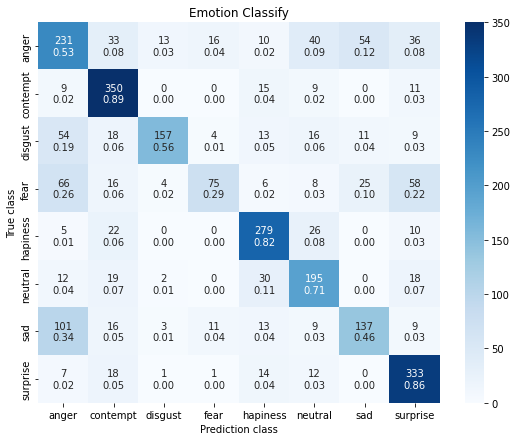

Class: anger Accuracy: 0.8292134831460675 Precision: 0.5334872979214781 Recall: 0.4762886597938144 F1_Score: 0.5032679738562091 Specificity: 0.9075514874141877

Class: contempt Accuracy: 0.9303370786516854 Precision: 0.8883248730964467 Recall: 0.7113821138211383 F1_Score: 0.7900677200902936 Specificity: 0.9797979797979798

Class: disgust Accuracy: 0.9445692883895132 Precision: 0.5567375886524822 Recall: 0.8722222222222222 F1_Score: 0.6796536796536795 Specificity: 0.9497991967871486

Class: fear Accuracy: 0.9194756554307116 Precision: 0.29069767441860467 Recall: 0.7009345794392523 F1_Score: 0.4109589041095891 Specificity: 0.9285992976980102

Class: hapiness Accuracy: 0.9385767790262173 Precision: 0.8157894736842105 Recall: 0.7342105263157894 F1_Score: 0.7728531855955679 Specificity: 0.9724890829694323

Class: neutral Accuracy: 0.9247191011235955 Precision: 0.7065217391304348 Recall: 0.6190476190476191 F1_Score: 0.6598984771573604 Specificity: 0.9656050955414013

Class: sad Accuracy: 0.9

In [ ]:
%%time
def add_values_in_dict(sample_dict, key, list_of_values):
            ''' Append multiple values to a key in 
            the given dictionary '''
            if key not in sample_dict:
                sample_dict[key] = list()
            sample_dict[key].extend(list_of_values)
            return sample_dict

filename = r'/content/Rf_f4.sav'
model = pickle.load(open(filename, 'rb'))
result = model.score(X2, y2)
pred = model.predict(X2)
cm = confusion_matrix(y2, pred)
label_mapdisgust = ['anger','contempt','disgust','fear','hapiness','neutral','sad','surprise']
        
        #cm1 = cm.astype(np.float64) / cm.sum(axis=1)[:, np.newaxis]
cm_df = pd.DataFrame(cm, index = label_mapdisgust,
              columns = label_mapdisgust
              )
        
final_cm = cm_df

        #เเสดงผล confus matrix
emotion_labels = ['anger','contempt','disgust','fear','hapiness','neutral','sad','surprise']
plt.figure(figsize = (5,5))
        #sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
make_confusion_matrix(cm, figsize=(9,7), categories=emotion_labels)
plt.title('Emotion Classify')
plt.ylabel('True class')
plt.xlabel('Prediction class')
plt.show()
 #ใช้เก็บค่า TP FP FN TN ใน loop  confus matrix 7*7
TP2 = 0
FP2 = 0 
FN2 = 0
TN2 = 0
scor = {}
avg_scor = {}
ac = 0
pr = 0
re = 0
f1 = 0
sp = 0
for i in range(final_cm.shape[0]):
          TP = final_cm.iloc[i,i]
          FP =  final_cm.iloc[i,:].sum() - TP
          FN =  final_cm.iloc[: ,i].sum() - TP
          TN =  final_cm.sum().sum() - TP -FP - FN
          TP2 += TP
          FP2 += FP
          FN2 += FN
          TN2 += TN
          Accuracy = (TP + TN)  /  final_cm.sum().sum()
          Precision = TP / (TP + FP)
          Recall = TP / (TP + FN)
          Specificity = TN / (TN + FP)
          F1_Score = (2* Precision * Recall ) / (Precision + Recall)
    
          print("Class:",final_cm.index[i],"Accuracy:",Accuracy,"Precision:", Precision,"Recall:", Recall, 
                  "F1_Score:", F1_Score, "Specificity:", Specificity )
          print()

          ac += Accuracy
          pr += Precision
          re += Recall
          f1 += F1_Score
          sp += Specificity

          add_values_in_dict(scor, final_cm.index[i], [f'{Accuracy:.2f}',f'{Precision:.2f}',f'{Recall:.2f}',f'{F1_Score:.2f}',f'{Specificity:.2f}'])
print ("{:<10} {:<10} {:<10} {:<10} {:<10} {:<10}".format('','Accuracy','Precision','Recall','F1_Score','Specificity'))
for k, v in scor.items():
          Accuracy, Precision, Recall,F1_Score,Specificity = v
          print ("{:<10} {:<10} {:<10} {:<10} {:<10} {:<10}".format(k, Accuracy, Precision, Recall,F1_Score,Specificity))
              #pd.DataFrame(classification_report(model.y_train, model.pred)).T
add_values_in_dict(avg_scor,'macro avg',[f'{ac/8:.2f}' , f'{pr/8:.2f}' , f'{re/8:.2f}' , f'{f1/8:.2f}', f'{sp/8:.2f}'])
print()
for k, v in avg_scor.items():
      ac, pr, re,f1,sp = v
      print ("{:<10} {:<10} {:<10} {:<10} {:<10} {:<10}".format(k, ac, pr, re,f1,sp))
   
        
Specificity = TN2 / (TN2 + FP2)
Sensitivity = TP2 / (FN2 + TP2)
print()  
print("Specificity", f'{Specificity:.2f}')
print("Sensitivity", f'{Sensitivity:.2f}')
#print(f"Overall Accuracy: {accuracy_score(y_test, pred) * 100:.2f}%")
print()
print("TP:", TP2)
print("FN:", FN2)
print("FP:", FP2)
print("TN:", TN2)

print()
Score = accuracy_score(y2, pred)
print(f"Accuracy Score: {accuracy_score(y2, pred) * 100:.2f}%")